In [115]:
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
import analyze_utils

save_dir = '/home/jxm3/research/prompting/interpretable-autoprompting/results_icml/ablation2_rerun'

r, all_losses = analyze_utils.load_results_and_cache_autoprompt_json(save_dir, save_file='r.pkl', include_losses=True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 480/480 [00:50<00:00,  9.57it/s]


In [118]:
len(all_losses)

480

In [119]:
len(r)

173873

In [123]:
top_prompts = (
    r.groupby(['task_name', 'n_shots', 'iprompt_conditioning_strategy', 'single_shot_loss', 'seed'])
).first().reset_index()
print(len(top_prompts))
top_prompts[['task_name', 'seed', 'max_digit', 'prefixes', 'reciprocal_rank']]

480


,task_name,seed,max_digit,prefixes,reciprocal_rank
0,add_two,1,10,Write a function called sum(),1.000000e+00
1,add_two,2,10,Input integers then add them together,1.000000e+00
2,add_two,3,10,Create a function named numberAdd,1.000000e+00
3,add_two,4,10,``Add two integers together,1.000000e+00
4,add_two,1,10,Read a series of values into,1.470588e-02
...,...,...,...,...,...
475,task183_rhyme_generation,4,10,Find the missing letter from that,1.000000e-10
476,task183_rhyme_generation,1,10,Find a word spelled backwards from,1.000000e-10
477,task183_rhyme_generation,2,10,http://cl.ly/,7.692308e-02
478,task183_rhyme_generation,3,10,Find the word that rhymes,1.000000e+00


In [124]:
MATH_TASK_NAMES = {
    'add_two', 'multiply_two', 'subtract_two', 'max_two', 
    'first_two', 'square_one', 'double_one', 'exp_one',  
    'fibonacci_one', 'divide_two'
}
TASK_IS_MATH = top_prompts['task_name'].map(lambda t: t in MATH_TASK_NAMES)
TASK_IS_ANLI = top_prompts['task_name'].map(lambda t: t not in MATH_TASK_NAMES)

In [136]:
pd.set_option('display.max_rows', None)
top_prompts[(top_prompts['single_shot_loss'] == 1) & (top_prompts['iprompt_conditioning_strategy'] == "")].sort_values(by='task_name')[['n_shots', 'task_name', 'prefixes', 'reciprocal_rank']]

,n_shots,task_name,prefixes,reciprocal_rank
0,1,add_two,Write a function called sum(),1.000000e+00
1,1,add_two,Input integers then add them together,1.000000e+00
2,1,add_two,Create a function named numberAdd,1.000000e+00
3,1,add_two,``Add two integers together,1.000000e+00
8,5,add_two,Write a function to add two,1.000000e+00
9,5,add_two,Read 2 integers from standard in,5.000000e-01
10,5,add_two,Read two integers from standard in,2.500000e-01
11,5,add_two,"""Add two positive integers",1.000000e+00
35,5,divide_two,a calculator with binary options (,2.000000e-01
34,5,divide_two,(1) If x =,1.724138e-02


In [126]:
top_prompts[TASK_IS_MATH].groupby(['n_shots', 'single_shot_loss', 'iprompt_conditioning_strategy']).count()['reciprocal_rank']

n_shots  single_shot_loss  iprompt_conditioning_strategy
1        1                                                  40
5        0                                                  40
         1                                                  40
                           unconditional                    40
                           x_only                           40
                           y_only                           40
Name: reciprocal_rank, dtype: int64

In [127]:
top_prompts[TASK_IS_MATH].groupby(['n_shots', 'single_shot_loss', 'iprompt_conditioning_strategy']).median()['prefix_train_loss']

n_shots  single_shot_loss  iprompt_conditioning_strategy
1        1                                                   1.838117
5        0                                                   9.773625
         1                                                   9.857821
                           unconditional                    10.327277
                           x_only                           10.305057
                           y_only                           10.260610
Name: prefix_train_loss, dtype: float64

In [128]:
top_prompts[TASK_IS_ANLI].groupby(['n_shots', 'single_shot_loss', 'iprompt_conditioning_strategy']).median()['prefix_train_loss']

n_shots  single_shot_loss  iprompt_conditioning_strategy
1        1                                                  2.706407
5        0                                                  2.733542
         1                                                  2.254403
                           unconditional                    2.634725
                           x_only                           2.706625
                           y_only                           2.734774
Name: prefix_train_loss, dtype: float64

In [138]:
top_prompts[TASK_IS_MATH].groupby(['n_shots', 'single_shot_loss', 'iprompt_conditioning_strategy']).mean()['reciprocal_rank']

n_shots  single_shot_loss  iprompt_conditioning_strategy
1        1                                                  0.556139
5        0                                                  0.060322
         1                                                  0.176259
                           unconditional                    0.144464
                           x_only                           0.182300
                           y_only                           0.137595
Name: reciprocal_rank, dtype: float64

In [137]:
top_prompts[TASK_IS_ANLI].groupby(['n_shots', 'single_shot_loss', 'iprompt_conditioning_strategy']).mean()['reciprocal_rank']

n_shots  single_shot_loss  iprompt_conditioning_strategy
1        1                                                  0.328980
5        0                                                  0.305123
         1                                                  0.276434
                           unconditional                    0.003238
                           x_only                           0.163259
                           y_only                           0.189492
Name: reciprocal_rank, dtype: float64

In [129]:
top_prompts.groupby(['n_shots', 'single_shot_loss', 'iprompt_conditioning_strategy']).mean()['reciprocal_rank']

n_shots  single_shot_loss  iprompt_conditioning_strategy
1        1                                                  0.442559
5        0                                                  0.182723
         1                                                  0.226346
                           unconditional                    0.073851
                           x_only                           0.172780
                           y_only                           0.163544
Name: reciprocal_rank, dtype: float64

In [68]:
d1['prefix_train_acc']

0.0

In [67]:
d1 = dict(top_prompts[
      (top_prompts['iprompt_conditioning_strategy'] == "") 
    & (top_prompts['single_shot_loss'] == 1)
].iloc[0])
d2 = {'task_name': 'add_two',  'seed': 6,  'checkpoint': 'EleutherAI/gpt-j-6B',  'iprompt_generation_checkpoint': 'EleutherAI/gpt-j-6B',  'model_cls': 'iprompt',  'batch_size': 16,  'n_epochs': 100,  'max_n_steps': 10000000000,  'max_n_datapoints': 5000,  'train_split_frac': 1.0,  'max_dset_size': 5000,  'early_stopping_steps': 50,  'max_digit': 10,  'template_num_init_string': 0,  'template_num_task_phrasing': 0,  'save_dir': '/home/jxm3/research/prompting/interpretable-autoprompting/results_icml/ablation3',  'epoch_save_interval': 1,  'lr': 0.0001,  'gamma': 0.0,  'n_shots': 5,  'autoprompt_init_strategy': 'the',  'max_length': 64,  'single_shot_loss': 1,  'mask_possible_answers': 0,  'hotflip_num_candidates': 10,  'accum_grad_over_epoch': 0,  'num_learned_tokens': 6,  'use_preprefix': 0,  'iprompt_preprefix_str': '',  'iprompt_pop_size': 4,  'iprompt_num_mutations': 2,  'iprompt_generation_repetition_penalty': 2.0,  'iprompt_generation_temp': 1.0,  'iprompt_generation_top_p': 1.0,  'iprompt_conditioning_strategy': '',  'iprompt_num_random_generations': 4,  'llm_float16': 1,  'use_generic_query': 0,  'train_start_time': 1674202498.5770762,  'prefix_ids': (705, 7061, 10, 15414, 22510, 16),  'prefixes': " '''+inputnum1",  'prefix_train_acc': 0.0,  'prefix_train_loss': 9.009683609008789,  'prefix_n_queries': 3,  'topk_pop_sample': 8,  'pop_size': 4,  'num_mutations_per_ex': 2,  'num_random_generations': 4,  'generation_temp': 1.0,  'generation_top_p': 1.0,  'generation_repetition_penalty': 2.0,  'generation_bad_words_ids': '198',  'pre_data_prompt_str': 'Data:\n\n',  'post_data_prompt_str': '\n\nPrompt:',  'prefixes__check_answer_func': True,  'train_end_time': 1674203377.112308,  'train_time_elapsed': 878.5352318286896,  'pickle_filename': '/home/jxm3/research/prompting/interpretable-autoprompting/results_icml/ablation3/Jan_20_03_14_ckjgfykqjqpb/results.pkl',  'final_answer_pos_initial_token': 0,  'reciprocal_rank': 1.0,  'iprompt_do_final_reranking': 1.0,  'iprompt_criterion': 'loss'}

d3 = {k: [v, d2[k]] for k,v in d1.items() if v != d2[k]}
d3

{'seed': [1, 6],
 'save_dir': ['/home/jxm3/research/prompting/interpretable-autoprompting/results_icml/ablation2',
  '/home/jxm3/research/prompting/interpretable-autoprompting/results_icml/ablation3'],
 'iprompt_generation_checkpoint': [None, 'EleutherAI/gpt-j-6B'],
 'train_start_time': [1674124353.4011478, 1674202498.5770762],
 'prefix_ids': [(19430, 257, 2163, 284, 751, 734),
  (705, 7061, 10, 15414, 22510, 16)],
 'prefixes': [' Write a function to add two', " '''+inputnum1"],
 'prefix_train_loss': [7.275566101074219, 9.009683609008789],
 'prefix_n_queries': [25, 3],
 'train_end_time': [1674125195.2376258, 1674203377.112308],
 'train_time_elapsed': [841.8364779949188, 878.5352318286896],
 'pickle_filename': ['/home/jxm3/research/prompting/interpretable-autoprompting/results_icml/ablation2/Jan_19_05_32_yrafjcztehvc/results.pkl',
  '/home/jxm3/research/prompting/interpretable-autoprompting/results_icml/ablation3/Jan_20_03_14_ckjgfykqjqpb/results.pkl']}

In [59]:
top_prompts[
      (top_prompts['iprompt_conditioning_strategy'] == "") 
    & (top_prompts['single_shot_loss'] == 1)
].groupby('task_name').mean().reset_index()[['task_name', 'reciprocal_rank']]

,task_name,reciprocal_rank
0,add_two,4.833333e-01
1,divide_two,1.448000e-02
2,double_one,4.138889e-01
3,exp_one,7.243488e-03
4,fibonacci_one,1.585930e-02
5,first_two,2.323441e-02
6,max_two,4.136348e-02
7,multiply_two,3.333333e-01
8,square_one,7.132584e-03
9,subtract_two,9.460784e-02


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

r_grouped_by_task = (
    top_prompts_df
     .groupby(['max_digit', 'task_name']).mean()
     .reset_index()
)

ax = sns.lineplot(
    data=r_grouped_by_task, x='max_digit', y='reciprocal_rank', hue='task_name',
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) # legend outside of plot
# ax.set_yscale('log')

In [ ]:
top_prompts_df[top_prompts_df['reciprocal_rank'] < 0.1][['prefixes','reciprocal_rank','task_name']]

## plot losses as lines.

In [85]:
len(all_losses), len(top_prompts)

(306, 296)

In [88]:
import numpy as np
max_loss_len = max([len(L) for L in all_losses])

all_losses_padded = []
for L in all_losses:
    last_val = L[-1]
    all_losses_padded.append(
        L + [last_val] * (max_loss_len - len(L))
    )
all_losses_padded = np.array(all_losses_padded)[:296] # 296 -> skip dups.

In [99]:
(top_prompts['reciprocal_rank'] > 0.5).sum()

38

In [106]:
len(all_losses_padded[GOOD_RUNS].mean(axis=0))

313

In [110]:
GOOD_RUNS.mean()

0.12837837837837837

Text(0, 0.5, 'NLL')

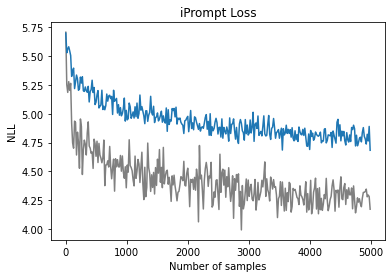

In [109]:
import matplotlib.pyplot as plt

GOOD_RUNS = (top_prompts['reciprocal_rank'] >= 0.99)

BATCH_SIZE = top_prompts['batch_size'].unique()[0]
X_AXIS = np.arange(all_losses_padded.shape[1]) * BATCH_SIZE

plt.plot(X_AXIS, all_losses_padded[GOOD_RUNS].mean(axis=0), color='gray')
plt.plot(X_AXIS, all_losses_padded[~GOOD_RUNS].mean(axis=0))

plt.title('iPrompt Loss')
plt.xlabel('Number of samples')
plt.ylabel('NLL')